In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Epoch 1/5
1563/1563 [==============================] - 292s 185ms/step - loss: 1.4602 - accuracy: 0.4917 - val_loss: 1.1049 - val_accuracy: 0.6093
Epoch 2/5
1563/1563 [==============================] - 293s 188ms/step - loss: 1.0160 - accuracy: 0.6453 - val_loss: 0.9319 - val_accuracy: 0.6724
Epoch 3/5
1563/1563 [==============================] - 290s 185ms/step - loss: 0.8318 - accuracy: 0.7083 - val_loss: 0.8151 - val_accuracy: 0.7168
Epoch 4/5
1563/1563 [==============================] - 289s 185ms/step - loss: 0.6966 - accuracy: 0.7585 - val_loss: 0.8024 - val_accuracy: 0.7275
Epoch 5/5
313/313 [==============================] - 16s 53ms/step - loss: 0.7713 - accuracy: 0.7397
Epoch 1/5
1563/1563 [==============================] - 293s 185ms/step - loss: 1.4509 - accuracy: 0.4946 - val_loss: 1.0938 - val_accuracy: 0.6095
Epoch 2/5
1563/1563 [==============================] - 289s 185ms/step - loss: 1.0211 - accuracy: 0.6415 - val_loss: 0.9172 - val_accuracy: 0.6817
Epoch 3/5
1563/15

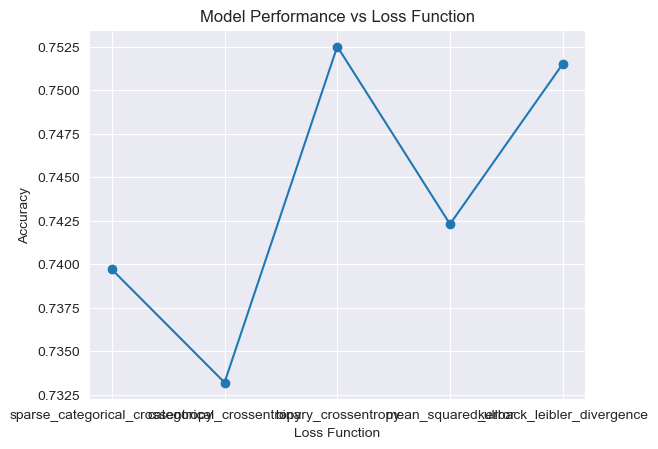

In [5]:
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy', 'binary_crossentropy', 'mean_squared_error', 'kullback_leibler_divergence']
accuracies_loss = []

for loss_function in loss_functions:
    # Create the model with the current loss function
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the current loss function
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=loss_function,
                  metrics=['accuracy'])
    
    # Convert labels to one-hot encoding if using categorical_crossentropy
    if loss_function == 'categorical_crossentropy':
        train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
        test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
        
    # Train the model
    model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

    # Evaluate the model and record accuracy
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    accuracies_loss.append(test_acc)

# Plotting
plt.plot(loss_functions, accuracies_loss, marker='o')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Loss Function')
plt.show()

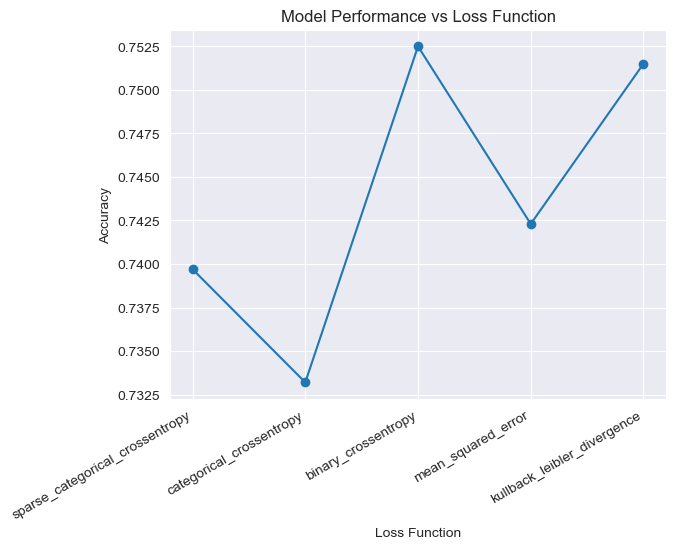

In [8]:
# Plotting
plt.plot(loss_functions, accuracies_loss, marker='o')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Loss Function')
plt.xticks(rotation=30, ha='right')
plt.show()